In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# 先在四个中心点附近产生一堆数据
real_center = [(1, 1), (1, 2), (2, 2), (2, 1)]
point_number = 50

In [48]:
points_x = []
points_y = []

for center in real_center:
    offset_x, offset_y = np.random.randn(point_number) * 0.3, np.random.randn(point_number) * 0.25
    x_val, y_val = center[0] + offset_x, center[1] + offset_y

    points_x.append(x_val)
    points_y.append(y_val)

points_x = np.concatenate(points_x)
points_y = np.concatenate(points_y)

In [49]:
print(np.random.randn(point_number) * 0.3, np.random.randn(point_number) * 0.25)

[-0.48589916  0.0498321  -0.04297309  0.29317724  0.28532954 -0.2234503
  0.19946929  0.05032313  0.02510209 -0.13741873 -0.20020478  0.25299517
 -0.02123701  0.3078106  -0.01641441 -0.19509889 -0.43265671 -0.22868416
 -0.20557279 -0.13188329 -0.02304415 -0.74158647  0.29376929 -0.65805269
  0.17172813 -0.11628499  0.37750488 -0.05996734  0.17995805 -0.03763734
  0.04936408  0.17828045 -0.04244248 -0.06026996  0.08857158 -0.12348912
  0.29323724 -0.00590902 -0.35158104  0.03098357 -0.18035676 -0.09041855
 -0.23756342  0.27188456 -0.41070893 -0.04806425  0.4872726   0.34902148
 -0.04509888 -0.10904614] [ 0.20067    -0.13434443  0.0396754   0.1432959   0.15069725 -0.03737993
  0.11585974  0.13937923 -0.078277    0.14515425 -0.01983874 -0.24350366
  0.29974885 -0.23712979 -0.05024467  0.46144605  0.00738319 -0.43995173
 -0.43537885 -0.00574593 -0.30613433 -0.48012763  0.14053673  0.21542711
 -0.08908053 -0.2878835  -0.01224097  0.31934186 -0.08262217 -0.11192376
  0.3539786   0.16337098 -

In [50]:
print(points_x.shape)
print(points_y.shape)

(200,)
(200,)


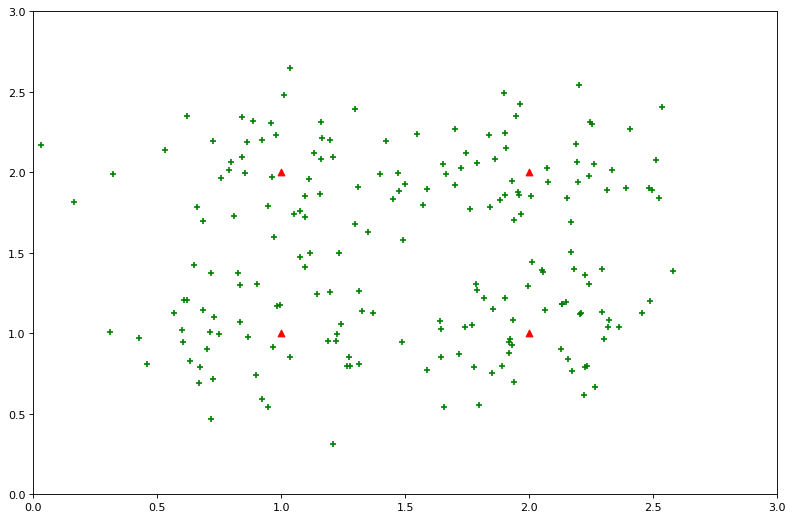

In [51]:
plt.figure(figsize=(12,8),dpi=80)
# 绘制点图
plt.scatter(points_x, points_y, color='green', marker='+')
# 绘制中心点
center_x, center_y = zip(*real_center)
plt.scatter(center_x, center_y, color='red', marker='^')
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

In [52]:
center_x, center_y = zip(*real_center)
print(center_x,center_y)

(1, 1, 2, 2) (1, 2, 2, 1)


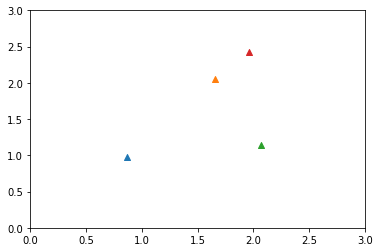

In [53]:
# 第一步，随机选择 K 个点
K = 4
p_list = np.stack([points_x, points_y], axis=1)
index = np.random.choice(len(p_list), size=K)
centeroid = p_list[index]
# 以下是画图部分
for p in centeroid:
    plt.scatter(p[0], p[1], marker='^')
    
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

In [54]:
print(p_list.shape)
print(p_list[1])
print(index)
print(centeroid)

(200, 2)
[1.1437026 1.241914 ]
[ 26  77 171 123]
[[0.86686978 0.97658317]
 [1.6524593  2.05073739]
 [2.06435645 1.14089955]
 [1.96383926 2.42076057]]


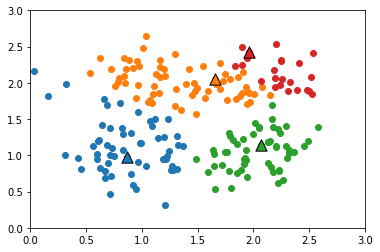

In [55]:
# 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
points_set = {key: [] for key in range(K)}

for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
    points_set[nearest_index].append(p)

# 以下是画图部分
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))

for ix, p in enumerate(centeroid):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

In [56]:
points_set = {key: [] for key in range(K)}
print(points_set)

{0: [], 1: [], 2: [], 3: []}


In [57]:
print(len(p_list))

200


In [58]:
print(np.sum((centeroid - p_list[0]) ** 2, axis=1))

[0.10392888 1.41746718 0.80198425 2.75170974]


In [59]:
print(np.sum((centeroid - p_list[0]) ** 2, axis=1)**0.5)

[0.32238002 1.19057431 0.89553573 1.65882782]


In [60]:
nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
print(nearest_index)

3


In [62]:
for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
    points_set[nearest_index].append(p)

print(points_set)

{0: [array([1.18847832, 0.95429367]), array([1.1437026, 1.241914 ]), array([1.22472499, 0.99665927]), array([0.67189872, 0.78680622]), array([1.27253739, 0.8506312 ]), array([0.71719944, 1.37331347]), array([0.83112436, 1.29819609]), array([0.69862753, 0.89982374]), array([0.71452856, 0.46471524]), array([0.74791103, 0.99505023]), array([1.07371759, 1.47075888]), array([0.60630454, 1.20309805]), array([1.19458651, 1.2578124 ]), array([0.72965353, 1.09747421]), array([0.96439084, 0.91198418]), array([0.98185446, 1.16728953]), array([0.68434061, 1.14379802]), array([0.61841528, 1.20615571]), array([0.94513188, 0.54197139]), array([0.42406106, 0.96822481]), array([1.32547476, 1.13591748]), array([0.6469642, 1.4243824]), array([0.72318083, 0.71730985]), array([1.36826332, 1.12583216]), array([1.09384023, 1.4103734 ]), array([0.86686978, 0.97658317]), array([1.24027734, 1.05397862]), array([0.92248186, 0.59054346]), array([0.31023166, 1.00822013]), array([0.89932794, 0.7385253 ]), array([0.

In [67]:
# 第三步，遍历每一个点集，计算新的聚类中心
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)

In [68]:
print(len(points_set))
print(centeroid)
print(type(centeroid))
print(centeroid[0,0])
print(centeroid[0,1])

4
[[0.86365571 1.12112218]
 [1.35678516 2.01123283]
 [2.03054416 1.05747405]
 [2.2335735  2.14361392]]
<class 'numpy.ndarray'>
0.8636557071616459
1.1211221831698044


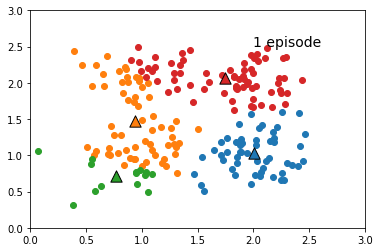

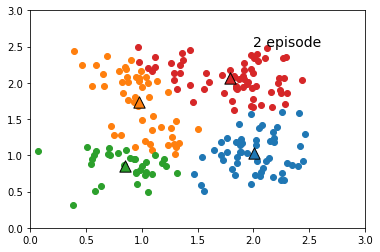

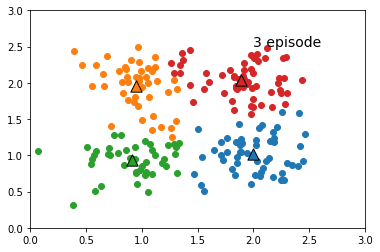

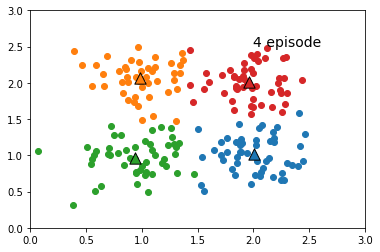

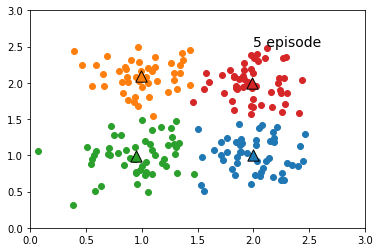

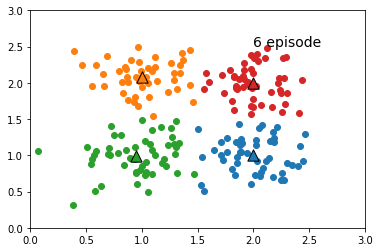

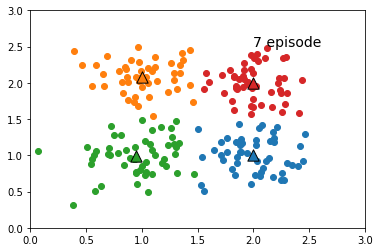

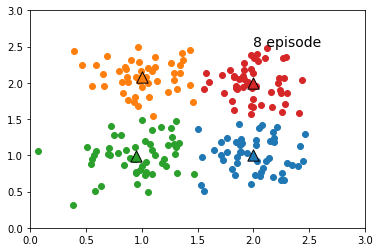

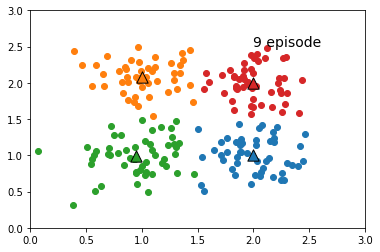

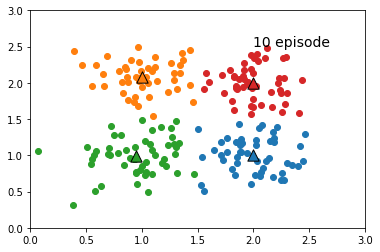

[[1.99560786 1.00525547]
 [1.00538452 2.08662917]
 [0.94975826 0.98912688]
 [2.00062355 1.99647726]]


In [102]:
# 第四步，重复进行以上步骤
for i in range(10):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))

    for ix, p in enumerate(centeroid):
        plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)
    
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.annotate('{} episode'.format(i + 1), xy=(2, 2.5), fontsize=14)
    plt.show()

print(centeroid)

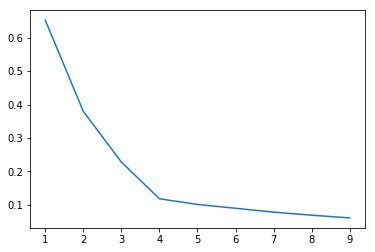

In [103]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
    loss.append(kmeans.inertia_ / point_number / K)
    
plt.plot(range(1, 10), loss)
plt.show()